# Bar Charts

## Acknowledgments

This notebook includes contributions and insights from **Patrick Wolfe, MLIS graduate, 2023**.


## What are Bar Charts

A bar chart is a type of graph that displays data using rectangular bars, where the length of each bar is proportional to the value it represents. Bar charts are commonly used to compare the sizes of different categories or groups of data.

In a typical bar chart, the x-axis represents the categories or groups being compared, while the y-axis represents the values being measured. The height or length of each bar corresponds to the value of the variable being measured.

Bar charts are useful for comparing discrete or categorical data, such as the number of people in different age groups or the sales figures for different products. They can be used to show relative frequencies, proportions, or percentages.

## Getting started

To start, you will want to go ahead and import three python libraries: matplotlib, numpy, and pandas.

In [9]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-darkgrid')
import numpy as np
import pandas as pd

Matplotlib is the library we will be using to create our bar charts in this tutorial. There are other libraries that we could use to create bar charts such as seaborn and plotly express that come with a variety of advanced features, but for this tutorial, the simplicity of matplotlib will do the trick. As you can see above the style was set to 'seaborn-darkgrid.'Feel free to change that to whatever you like. Find more styles at <a href= "https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html">Matplotlib: Style Sheet Reference</a>.

Numpy provides the functionality of n-dimensional arrays. Compared to Python lists, numpy arrays save memory usage and provide a variety of benefits for easy mathematical calculations.

Pandas is one of the go-to libraries for data analysis. While it can be used for data visualization, that is not what it will be used for here. Rather it will be used for its Dataframe class to provide structure to the data so that it is more malleable.

## Creating a Basic Bar Chart

The code below displays a simple bar chart using lists. The list x will be passed into the matplotlib function as the x parameter as will the y list into the y parameter. It is important that whatever is passed into the x and y parameters have the same shape/length as the other or it will throw an error. This is one advantage of using a numpy array as they are fixed, but for this simple example, it is good to illustrate that you can use types of list structures in the parameters.

After the bar function is called you can call functions to add extra labels and visual aids to improve the viewing experience. In this example, labels are created to define the X and Y axis and the Title goes across the top to define what the data in the chart is trying to display.

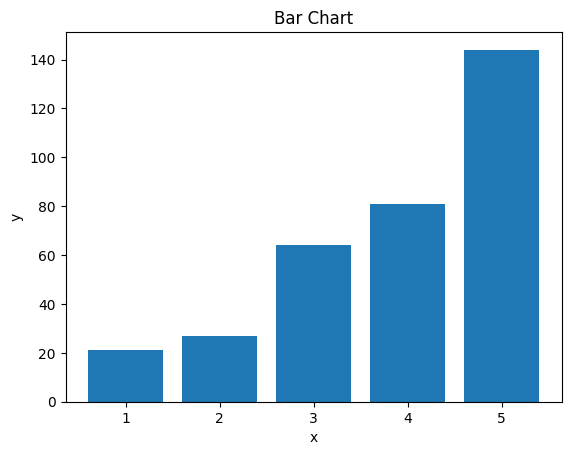

In [10]:
x = [1,2,3,4,5]
y = [21,27,64,81,144]

plt.bar(x, y)
plt.xlabel('x')
plt.ylabel('y') 
plt.title('Bar Chart')
plt.show()

## Working with Real Data

Now that we did a simple example with made-up data, let's make an example with actual data.

The data in this example will be regarding illegal wildlife trade across different biomes and taxa found in a journal article titled <a href='https://doi.org/10.1126/science.aav5327'><i>Global Wildlife Trade Across the Tree of Life</i></a>. The original data can be downloaded from this link. However, I have already made some changes to this data which can be found here.

Start by reading the CSV into a variable using the pandas read_csv function. This will put everything into a dataframe object. The first row will be automatically read in as headers unless specified not to. Make sure to look through the data to get a feel for how everything is laid out.


If you have data you would rather use, feel free to use it. Just make sure to change the path in the data variable.

In [13]:
data = pd.read_csv('../Data_Visualization/aav5327_tables7_rev.csv')
data.head()

,Taxa,Realm,Biome,N,N Traded,N Pet-Traded (%),N Product-Traded (%)
0,Amphibian,Afrotropical,Deserts & Xeric Shrublands,103,15,10 (9.71),6 (5.83)
1,Amphibian,Afrotropical,Flooded Grasslands & Savannas,130,25,19 (14.62),7 (5.38)
2,Amphibian,Afrotropical,Mangroves,81,22,17 (20.99),6 (7.41)
3,Amphibian,Afrotropical,"Mediterranean Forests, Woodlands & Scrub",52,4,3 (5.77),1 (1.92)
4,Amphibian,Afrotropical,Montane Grasslands & Shrublands,250,37,25 (10.00),11 (4.40)


Next, we are going to use the groupby function from pandas to isolate the two columns we are interested in, Biome and N Traded. This will automatically index the Biome column unless specified otherwise. We will use the functions sum and sort_values on the N Traded column, to sum up, and sort by the values of this column. Make sure to have N Traded in two sets of [ ] otherwise it will try and read it as a series rather than a dataframe.

In [14]:
biome_taxa = data.groupby(["Biome"], group_keys = True)[["N Traded"]].sum().sort_values("N Traded", ascending = True)
biome_taxa.head()



,N Traded
Biome,
Tundra,685
Boreal Forests/Taiga,885
"Mediterranean Forests, Woodlands & Scrub",1842
"Temperate Grasslands, Savannas & Shrublands",1959
Flooded Grasslands & Savannas,2164


Finally, we will do something similar to what we did above. However, this time we will use a horizontal bar chart as it will be easier to read. This is simply done by using the barh function instead of bar. 

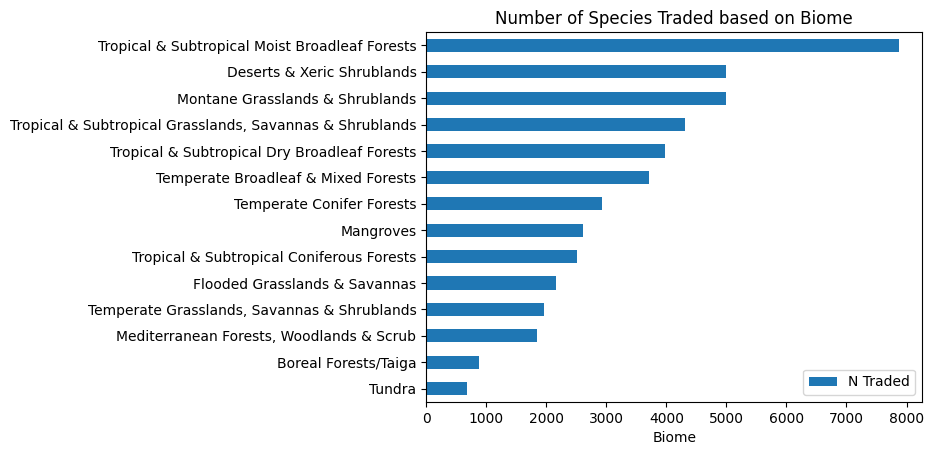

In [15]:
biome_taxa.plot.barh()
plt.xlabel('Biome')
plt.ylabel('') 
plt.title('Number of Species Traded based on Biome')
plt.show()
